In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime,date
import time
import matplotlib.patches as mpatches
import scipy.stats as st

In [2]:
covid_data = pd.read_csv("../Output/industry/M_C19_AU_2018_2021.csv")
unemployment_data = pd.read_csv("Ray Data/employment_study_1.csv")

In [3]:
#clean to have same number of data points as unemployment (38)
covid_data.drop(covid_data.tail(1).index,inplace=True)
covid_data.tail()

,Unnamed: 0,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,AU,Month
34,34,3,157,15,30,61,0,-1,52,317,11_2020
35,35,1,346,22,51,18,4,31,40,513,12_2020
36,36,0,182,23,57,16,0,73,42,393,01_2021
37,37,0,70,7,21,20,0,32,10,160,02_2021
38,38,5,116,3,146,40,0,3,31,344,03_2021


## Confirmed Cases VS Unemployment Rate Trend

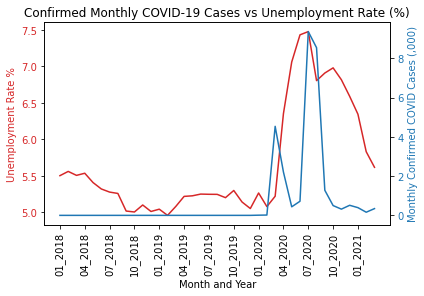

In [4]:
# y variables
unemployment_aus = unemployment_data["Unemployment_Rate_AUS"]
cases_aus = covid_data["AU"] / 1000

#x variable for line graph
timepoints = covid_data["Month"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month and Year')
ax1.set_ylabel('Unemployment Rate %', color=color)
ax1.plot(timepoints, unemployment_aus, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36], rotation="vertical")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly Confirmed COVID Cases (,000)', color=color)  # we already handled the x-label with ax1
ax2.plot(timepoints, cases_aus, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('Confirmed Monthly COVID-19 Cases vs Unemployment Rate (%)')

# adding ticks to only every quarter
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36], rotation="vertical")

#save to output
plt.savefig("../Output/employment_output/confirmed_vs_unemployment_aus_line_no_lag.png")
plt.show()


## Confirmed Cases vs Unemployment Rate Regression

The correlation of monthly covid cases on unemployment rate is 0.51
The p-value is 0.00084, with atleast 95% confidence we can reject the null hypothesis.
-------------------------------------------------------------------------------------
If we can reject the null hypothesis, we can make such statements:
-------------------------------------------------------------------------------------
Confirmed COVID cases in Australia explains for 26.3% of the change in unemployment rate in the same period.
Every 1000 cases of confirmed COVID cases is expected to cause a 0.19% increase in unemployment rate.
The unemployment rate is expected to be 5.53% without the presence of confirmed COVID cases.


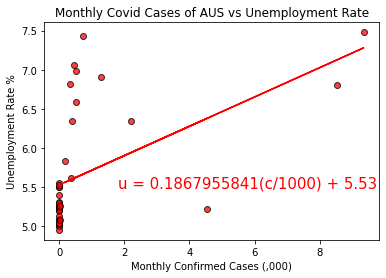

In [5]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_aus, unemployment_aus)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_aus, unemployment_aus)
regress_values = cases_aus * slope + intercept
line_eq = "u = " + str(round(slope,10)) + "(c/1000) + " + str(round(intercept,2))
plt.annotate(line_eq,(1.8,5.5),fontsize=15,color="red")
plt.plot(cases_aus,regress_values,"r-")

print(f"The correlation of monthly covid cases on unemployment rate is {round(correlation[0],2)}")
print(f"The p-value is {round(correlation[1],5)}, with atleast 95% confidence we can reject the null hypothesis.")
print(f"-------------------------------------------------------------------------------------")
print(f"If we can reject the null hypothesis, we can make such statements:")
print(f"-------------------------------------------------------------------------------------")
print(f"Confirmed COVID cases in Australia explains for {round(correlation[0]**2*100,1)}% of the change in unemployment rate in the same period.")
print(f"Every 1000 cases of confirmed COVID cases is expected to cause a {round(slope, 2)}% increase in unemployment rate.")
print(f"The unemployment rate is expected to be {round(intercept,2)}% without the presence of confirmed COVID cases.")

plt.scatter(cases_aus, unemployment_aus, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Monthly Confirmed Cases (,000)")
plt.ylabel("Unemployment Rate %")
plt.title("Monthly Covid Cases of AUS vs Unemployment Rate")

#save to output
plt.savefig("../Output/employment_output/confirmed_vs_unemployment_aus_regression_no_lag.png")

plt.show()


In [6]:
#unemployment is a lagging indicator, time to chop the top value to allign covid case data with unemployment the month after
unemployment_data = unemployment_data.iloc[1:]
unemployment_data.head()

,Unnamed: 0,Date,Unemployment_Rate_AUS,Unemployment_Rate_NSW,Unemployment_Rate_VIC,Unemployment_Rate_QLD,Unemployment_Rate_SA,Unemployment_Rate_WA,Unemployment_Rate_TAS,Unemployment_Rate_NT,Unemployment_Rate_ACT,Month,Year
1,1,2018-02-01,5.559338,4.822227,5.582018,6.342373,6.229473,6.136357,5.955918,4.062224,3.895920,2,2018
2,2,2018-03-01,5.505104,4.974445,5.242348,6.039556,5.570476,6.878773,5.987308,3.810160,3.792877,3,2018
3,3,2018-04-01,5.534267,4.926401,5.201760,6.491841,5.788742,6.424739,5.902720,4.497818,3.627720,4,2018
4,4,2018-05-01,5.406442,4.864832,5.076189,6.208778,5.729293,6.284294,6.596782,3.928256,3.446903,5,2018
5,5,2018-06-01,5.318580,4.668844,5.548635,5.805580,5.532035,6.191218,5.757447,4.423351,3.778179,6,2018


In [7]:
covid_data.tail()

,Unnamed: 0,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,AU,Month
34,34,3,157,15,30,61,0,-1,52,317,11_2020
35,35,1,346,22,51,18,4,31,40,513,12_2020
36,36,0,182,23,57,16,0,73,42,393,01_2021
37,37,0,70,7,21,20,0,32,10,160,02_2021
38,38,5,116,3,146,40,0,3,31,344,03_2021


In [8]:
#clean to have same number of data points as unemployment (37)
covid_data.drop(covid_data.tail(1).index,inplace=True)
covid_data.tail()

,Unnamed: 0,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,AU,Month
33,33,1,198,5,15,33,0,163,84,499,10_2020
34,34,3,157,15,30,61,0,-1,52,317,11_2020
35,35,1,346,22,51,18,4,31,40,513,12_2020
36,36,0,182,23,57,16,0,73,42,393,01_2021
37,37,0,70,7,21,20,0,32,10,160,02_2021


## Australian Confirmed Cases vs Unemployment Rate the Month After Trend

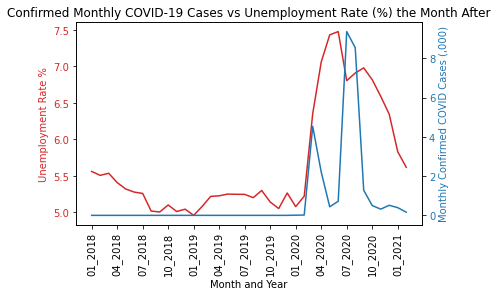

In [9]:
# y variables
unemployment_aus = unemployment_data["Unemployment_Rate_AUS"]
cases_aus = covid_data["AU"] / 1000
#x variable for line graph
timepoints = covid_data["Month"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month and Year')
ax1.set_ylabel('Unemployment Rate %', color=color)
ax1.plot(timepoints, unemployment_aus, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36], rotation="vertical")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly Confirmed COVID Cases (,000)', color=color)  # we already handled the x-label with ax1
ax2.plot(timepoints, cases_aus, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('Confirmed Monthly COVID-19 Cases vs Unemployment Rate (%) the Month After')

# adding ticks to only every quarter
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36], rotation="vertical")

#save to output
plt.savefig("../Output/employment_output/confirmed_vs_unemployment_aus_line.png")

plt.show()




## Australian Confirmed Cases vs Unemployment Rate the Month After Regression

The correlation of monthly covid cases on unemployment rate is 0.53
The p-value is 0.00063, with atleast 95% confidence we can reject the null hypothesis.
-------------------------------------------------------------------------------------
If we can reject the null hypothesis, we can make such statements:
-------------------------------------------------------------------------------------
Confirmed COVID cases in Australia explains for 28.0% of the change in unemployment rate in the period after.
Every 1000 cases of confirmed COVID cases is expected to cause a 0.19% increase in unemployment rate.
The unemployment rate is expected to be 5.53% without the presence of confirmed COVID cases.


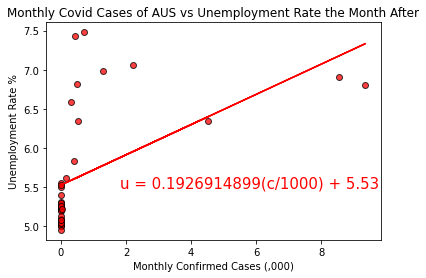

In [10]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_aus, unemployment_aus)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_aus, unemployment_aus)
regress_values = cases_aus * slope + intercept
line_eq = "u = " + str(round(slope,10)) + "(c/1000) + " + str(round(intercept,2))
plt.annotate(line_eq,(1.8,5.5),fontsize=15,color="red")
plt.plot(cases_aus,regress_values,"r-")

print(f"The correlation of monthly covid cases on unemployment rate is {round(correlation[0],2)}")
print(f"The p-value is {round(correlation[1],5)}, with atleast 95% confidence we can reject the null hypothesis.")
print(f"-------------------------------------------------------------------------------------")
print(f"If we can reject the null hypothesis, we can make such statements:")
print(f"-------------------------------------------------------------------------------------")
print(f"Confirmed COVID cases in Australia explains for {round(correlation[0]**2*100,1)}% of the change in unemployment rate in the period after.")
print(f"Every 1000 cases of confirmed COVID cases is expected to cause a {round(slope, 2)}% increase in unemployment rate.")
print(f"The unemployment rate is expected to be {round(intercept,2)}% without the presence of confirmed COVID cases.")

plt.scatter(cases_aus, unemployment_aus, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Monthly Confirmed Cases (,000)")
plt.ylabel("Unemployment Rate %")
plt.title("Monthly Covid Cases of AUS vs Unemployment Rate the Month After")

#save to output
plt.savefig("../Output/employment_output/confirmed_vs_unemployment_aus_regression.png")

plt.show()

In [11]:
#defining unemployment rate (y) variable for state data
unemployment_act = unemployment_data["Unemployment_Rate_ACT"]
unemployment_qld = unemployment_data["Unemployment_Rate_QLD"]
unemployment_nsw = unemployment_data["Unemployment_Rate_NSW"]
unemployment_nt = unemployment_data["Unemployment_Rate_NT"]
unemployment_sa = unemployment_data["Unemployment_Rate_SA"]
unemployment_tas = unemployment_data["Unemployment_Rate_TAS"]
unemployment_vic = unemployment_data["Unemployment_Rate_VIC"]
unemployment_wa = unemployment_data["Unemployment_Rate_WA"]

## Unemployments per State and Territory Trend

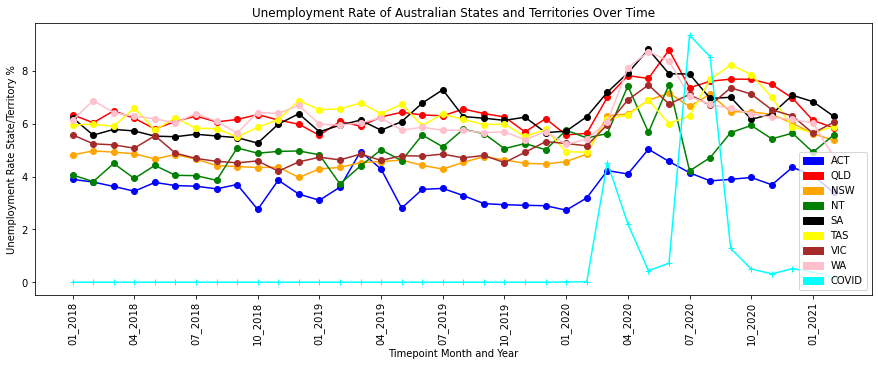

In [12]:
#x variable for line graph
timepoints = covid_data["Month"]

#plots
plt.figure(figsize=(15, 5))

plt.plot(timepoints, unemployment_act, marker ='o', color='blue', label = "ACT")
plt.plot(timepoints, unemployment_qld, marker ='o', color='red', label = "QLD")
plt.plot(timepoints, unemployment_nsw, marker ='o', color='orange', label = "NSW")
plt.plot(timepoints, unemployment_nt, marker ='o', color='green', label = "NT")
plt.plot(timepoints, unemployment_sa, marker ='o', color='black', label = "SA")
plt.plot(timepoints, unemployment_tas, marker ='o', color='yellow', label = "TAS")
plt.plot(timepoints, unemployment_vic, marker ='o', color='brown', label = "VIC")
plt.plot(timepoints, unemployment_wa, marker ='o', color='pink', label = "WA")
plt.plot(timepoints, cases_aus, marker ='+', color='cyan', label = "COVID")

# adding ticks to only every quarter
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36], rotation="vertical")

# labeling
plt.xlabel("Timepoint Month and Year")
plt.ylabel("Unemployment Rate State/Territory %")
plt.title('Unemployment Rate of Australian States and Territories Over Time')

#creating pretty legend
act_handle = mpatches.Patch(color='blue', label='ACT')
qld_handle = mpatches.Patch(color='red', label='QLD')
nsw_handle = mpatches.Patch(color='orange', label='NSW')
nt_handle = mpatches.Patch(color='green', label='NT')
sa_handle = mpatches.Patch(color='black', label='SA')
tas_handle = mpatches.Patch(color='yellow', label='TAS')
vic_handle = mpatches.Patch(color='brown', label='VIC')
wa_handle = mpatches.Patch(color='pink', label='WA')
covid_handle = mpatches.Patch(color='cyan', label='COVID')
plt.legend(handles= [act_handle, qld_handle, nsw_handle, nt_handle,
                     sa_handle, tas_handle, vic_handle, wa_handle, covid_handle   ])

#save to output
plt.savefig("../Output/employment_output/confirmed_vs_unemployment_state_line.png")
#show output
plt.show()

In [13]:
#defining confirmed cases variable for each state
cases_act = covid_data["ACT"] / 1000
cases_qld = covid_data["QLD"] / 1000
cases_nsw = covid_data["NSW"] / 1000 
cases_nt = covid_data["NT"] / 1000 
cases_sa = covid_data["SA"] / 1000 
cases_tas = covid_data["TAS"] / 1000 
cases_vic = covid_data["VIC"] / 1000 
cases_wa = covid_data["WA"] / 1000 

## State Scatterplots

The correlation of monthly covid cases on unemployment rate is 0.22
The p-value is 0.18254, with atleast 95% confidence we cannot reject the null hypothesis.
-------------------------------------------------------------------------------------
If we can reject the null hypothesis, we can make such statements:
-------------------------------------------------------------------------------------
Confirmed COVID cases in Australia explains for 4.9% of the change in unemployment rate in the period after.
Every 1000 cases of confirmed COVID cases is expected to cause a 9.3% increase in unemployment rate.
The unemployment rate is expected to be 3.63% without the presence of confirmed COVID cases.


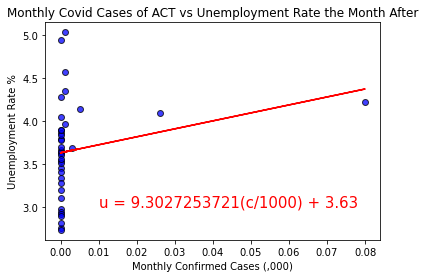

In [23]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_act, unemployment_act)

#regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_act, unemployment_act)
regress_values = cases_act * slope + intercept
line_eq = "u = " + str(round(slope,10)) + "(c/1000) + " + str(round(intercept,2))
plt.annotate(line_eq,(0.01,3.0),fontsize=15,color="red")
plt.plot(cases_act,regress_values,"r-")

print(f"The correlation of monthly covid cases on unemployment rate is {round(correlation[0],2)}")
print(f"The p-value is {round(correlation[1],5)}, with atleast 95% confidence we cannot reject the null hypothesis.")
print(f"-------------------------------------------------------------------------------------")
print(f"If we can reject the null hypothesis, we can make such statements:")
print(f"-------------------------------------------------------------------------------------")
print(f"Confirmed COVID cases in Australia explains for {round(correlation[0]**2*100,1)}% of the change in unemployment rate in the period after.")
print(f"Every 1000 cases of confirmed COVID cases is expected to cause a {round(slope, 2)}% increase in unemployment rate.")
print(f"The unemployment rate is expected to be {round(intercept,2)}% without the presence of confirmed COVID cases.")

plt.scatter(cases_act, unemployment_act, marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.xlabel("Monthly Confirmed Cases (,000)")
plt.ylabel("Unemployment Rate %")
plt.title("Monthly Covid Cases of ACT vs Unemployment Rate the Month After")

#save to output
plt.savefig("../Output/employment_output/confirmed_vs_unemployment_act_regression.png")

plt.show()

The correlation of monthly covid cases on unemployment rate is 0.26
The p-value is 0.11206, with atleast 95% confidence we cannot reject the null hypothesis.
-------------------------------------------------------------------------------------
If we can reject the null hypothesis, we can make such statements:
-------------------------------------------------------------------------------------
Confirmed COVID cases in Australia explains for 6.9% of the change in unemployment rate in the period after.
Every 1000 cases of confirmed COVID cases is expected to cause a 1.57% increase in unemployment rate.
The unemployment rate is expected to be 6.45% without the presence of confirmed COVID cases.


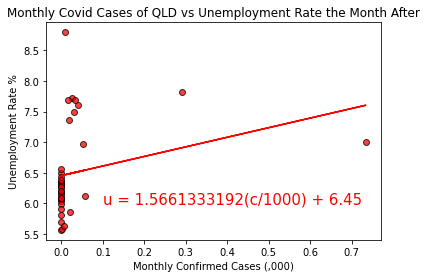

In [22]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_qld, unemployment_qld)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_qld, unemployment_qld)
regress_values = cases_qld * slope + intercept
line_eq = "u = " + str(round(slope,10)) + "(c/1000) + " + str(round(intercept,2))
plt.annotate(line_eq,(0.1,6.0),fontsize=15,color="red")
plt.plot(cases_qld,regress_values,"r-")

print(f"The correlation of monthly covid cases on unemployment rate is {round(correlation[0],2)}")
print(f"The p-value is {round(correlation[1],5)}, with atleast 95% confidence we cannot reject the null hypothesis.")
print(f"-------------------------------------------------------------------------------------")
print(f"If we can reject the null hypothesis, we can make such statements:")
print(f"-------------------------------------------------------------------------------------")
print(f"Confirmed COVID cases in Australia explains for {round(correlation[0]**2*100,1)}% of the change in unemployment rate in the period after.")
print(f"Every 1000 cases of confirmed COVID cases is expected to cause a {round(slope, 2)}% increase in unemployment rate.")
print(f"The unemployment rate is expected to be {round(intercept,2)}% without the presence of confirmed COVID cases.")

plt.scatter(cases_qld, unemployment_qld, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Monthly Confirmed Cases (,000)")
plt.ylabel("Unemployment Rate %")
plt.title("Monthly Covid Cases of QLD vs Unemployment Rate the Month After")

#save to output
plt.savefig("../Output/employment_output/confirmed_vs_unemployment_qld_regression.png")

plt.show()

The correlation of monthly covid cases on unemployment rate is 0.5
The p-value is 0.00132, with atleast 95% confidence we can reject the null hypothesis.
-------------------------------------------------------------------------------------
If we can reject the null hypothesis, we can make such statements:
-------------------------------------------------------------------------------------
Confirmed COVID cases in Australia explains for 25.2% of the change in unemployment rate in the period after.
Every 1000 cases of confirmed COVID cases is expected to cause a 1.27% increase in unemployment rate.
The unemployment rate is expected to be 4.97% without the presence of confirmed COVID cases.


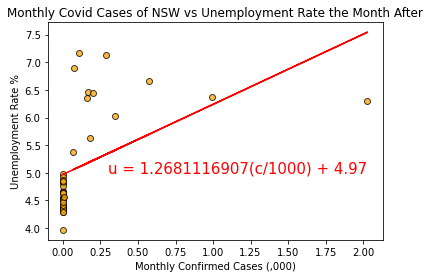

In [25]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_nsw, unemployment_nsw)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_nsw, unemployment_nsw)
regress_values = cases_nsw * slope + intercept
line_eq = "u = " + str(round(slope,10)) + "(c/1000) + " + str(round(intercept,2))
plt.annotate(line_eq,(0.3,5.0),fontsize=15,color="red")
plt.plot(cases_nsw,regress_values,"r-")

print(f"The correlation of monthly covid cases on unemployment rate is {round(correlation[0],2)}")
print(f"The p-value is {round(correlation[1],5)}, with atleast 95% confidence we can reject the null hypothesis.")
print(f"-------------------------------------------------------------------------------------")
print(f"If we can reject the null hypothesis, we can make such statements:")
print(f"-------------------------------------------------------------------------------------")
print(f"Confirmed COVID cases in Australia explains for {round(correlation[0]**2*100,1)}% of the change in unemployment rate in the period after.")
print(f"Every 1000 cases of confirmed COVID cases is expected to cause a {round(slope, 2)}% increase in unemployment rate.")
print(f"The unemployment rate is expected to be {round(intercept,2)}% without the presence of confirmed COVID cases.")

plt.scatter(cases_nsw, unemployment_nsw, marker="o", facecolors="orange", edgecolors="black", alpha=0.75)
plt.xlabel("Monthly Confirmed Cases (,000)")
plt.ylabel("Unemployment Rate %")
plt.title("Monthly Covid Cases of NSW vs Unemployment Rate the Month After")

#save to output
plt.savefig("../Output/employment_output/confirmed_vs_unemployment_nsw_regression.png")

plt.show()

The correlation of monthly covid cases on unemployment rate is 0.28
The p-value is 0.08297, with atleast 95% confidence we cannot reject the null hypothesis.
-------------------------------------------------------------------------------------
If we can reject the null hypothesis, we can make such statements:
-------------------------------------------------------------------------------------
Confirmed COVID cases in Australia explains for 8.1% of the change in unemployment rate in the period after.
Every 1000 cases of confirmed COVID cases is expected to cause a 39.16% increase in unemployment rate.
The unemployment rate is expected to be 4.95% without the presence of confirmed COVID cases.


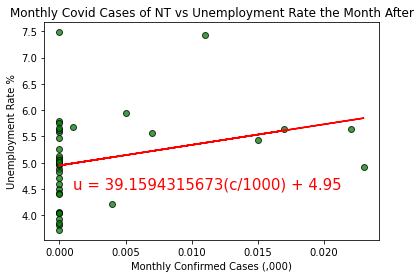

In [26]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_nt, unemployment_nt)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_nt, unemployment_nt)
regress_values = cases_nt * slope + intercept
line_eq = "u = " + str(round(slope,10)) + "(c/1000) + " + str(round(intercept,2))
plt.annotate(line_eq,(0.001,4.5),fontsize=15,color="red")
plt.plot(cases_nt,regress_values,"r-")

print(f"The correlation of monthly covid cases on unemployment rate is {round(correlation[0],2)}")
print(f"The p-value is {round(correlation[1],5)}, with atleast 95% confidence we cannot reject the null hypothesis.")
print(f"-------------------------------------------------------------------------------------")
print(f"If we can reject the null hypothesis, we can make such statements:")
print(f"-------------------------------------------------------------------------------------")
print(f"Confirmed COVID cases in Australia explains for {round(correlation[0]**2*100,1)}% of the change in unemployment rate in the period after.")
print(f"Every 1000 cases of confirmed COVID cases is expected to cause a {round(slope, 2)}% increase in unemployment rate.")
print(f"The unemployment rate is expected to be {round(intercept,2)}% without the presence of confirmed COVID cases.")

plt.scatter(cases_nt, unemployment_nt, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.xlabel("Monthly Confirmed Cases (,000)")
plt.ylabel("Unemployment Rate %")
plt.title("Monthly Covid Cases of NT vs Unemployment Rate the Month After")

#save to output
plt.savefig("../Output/employment_output/confirmed_vs_unemployment_nt_regression.png")

plt.show()

The correlation of monthly covid cases on unemployment rate is 0.29
The p-value is 0.08104, with atleast 95% confidence we cannot reject the null hypothesis.
-------------------------------------------------------------------------------------
If we can reject the null hypothesis, we can make such statements:
-------------------------------------------------------------------------------------
Confirmed COVID cases in Australia explains for 8.2% of the change in unemployment rate in the period after.
Every 1000 cases of confirmed COVID cases is expected to cause a 4.15% increase in unemployment rate.
The unemployment rate is expected to be 6.28% without the presence of confirmed COVID cases.


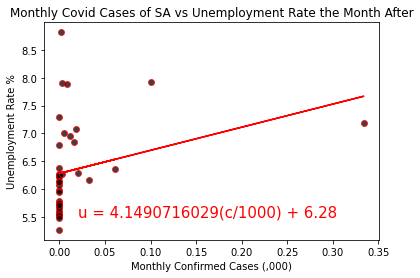

In [27]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_sa, unemployment_sa)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_sa, unemployment_sa)
regress_values = cases_sa * slope + intercept
line_eq = "u = " + str(round(slope,10)) + "(c/1000) + " + str(round(intercept,2))
plt.annotate(line_eq,(0.02,5.5),fontsize=15,color="red")
plt.plot(cases_sa,regress_values,"r-")

print(f"The correlation of monthly covid cases on unemployment rate is {round(correlation[0],2)}")
print(f"The p-value is {round(correlation[1],5)}, with atleast 95% confidence we cannot reject the null hypothesis.")
print(f"-------------------------------------------------------------------------------------")
print(f"If we can reject the null hypothesis, we can make such statements:")
print(f"-------------------------------------------------------------------------------------")
print(f"Confirmed COVID cases in Australia explains for {round(correlation[0]**2*100,1)}% of the change in unemployment rate in the period after.")
print(f"Every 1000 cases of confirmed COVID cases is expected to cause a {round(slope, 2)}% increase in unemployment rate.")
print(f"The unemployment rate is expected to be {round(intercept,2)}% without the presence of confirmed COVID cases.")

plt.scatter(cases_sa, unemployment_sa, marker="o", facecolors="black", edgecolors="red", alpha=0.75)
plt.xlabel("Monthly Confirmed Cases (,000)")
plt.ylabel("Unemployment Rate %")
plt.title("Monthly Covid Cases of SA vs Unemployment Rate the Month After")

#save to output
plt.savefig("../Output/employment_output/confirmed_vs_unemployment_sa_regression.png")

plt.show()

The correlation of monthly covid cases on unemployment rate is 0.02
The p-value is 0.89652, with atleast 95% confidence we cannot reject the null hypothesis.
-------------------------------------------------------------------------------------
If we can reject the null hypothesis, we can make such statements:
-------------------------------------------------------------------------------------
Confirmed COVID cases in Australia explains for 0.0% of the change in unemployment rate in the period after.
Every 1000 cases of confirmed COVID cases is expected to cause a 0.56% increase in unemployment rate.
The unemployment rate is expected to be 6.23% without the presence of confirmed COVID cases.


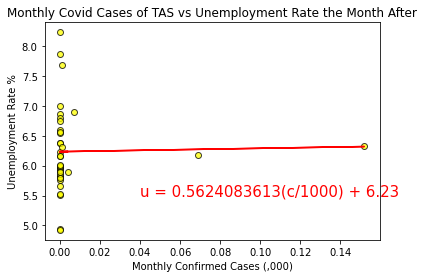

In [29]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_tas, unemployment_tas)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_tas, unemployment_tas)
regress_values = cases_tas * slope + intercept
line_eq = "u = " + str(round(slope,10)) + "(c/1000) + " + str(round(intercept,2))
plt.annotate(line_eq,(0.04,5.5),fontsize=15,color="red")
plt.plot(cases_tas,regress_values,"r-")

print(f"The correlation of monthly covid cases on unemployment rate is {round(correlation[0],2)}")
print(f"The p-value is {round(correlation[1],5)}, with atleast 95% confidence we cannot reject the null hypothesis.")
print(f"-------------------------------------------------------------------------------------")
print(f"If we can reject the null hypothesis, we can make such statements:")
print(f"-------------------------------------------------------------------------------------")
print(f"Confirmed COVID cases in Australia explains for {round(correlation[0]**2*100,1)}% of the change in unemployment rate in the period after.")
print(f"Every 1000 cases of confirmed COVID cases is expected to cause a {round(slope, 2)}% increase in unemployment rate.")
print(f"The unemployment rate is expected to be {round(intercept,2)}% without the presence of confirmed COVID cases.")

plt.scatter(cases_tas, unemployment_tas, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75)
plt.xlabel("Monthly Confirmed Cases (,000)")
plt.ylabel("Unemployment Rate %")
plt.title("Monthly Covid Cases of TAS vs Unemployment Rate the Month After")

#save to output
plt.savefig("../Output/employment_output/confirmed_vs_unemployment_tas_regression.png")

plt.show()

The correlation of monthly covid cases on unemployment rate is 0.45
The p-value is 0.00477, with atleast 95% confidence we can reject the null hypothesis.
-------------------------------------------------------------------------------------
If we can reject the null hypothesis, we can make such statements:
-------------------------------------------------------------------------------------
Confirmed COVID cases in Australia explains for 20.1% of the change in unemployment rate in the period after.
Every 1000 cases of confirmed COVID cases is expected to cause a 0.22% increase in unemployment rate.
The unemployment rate is expected to be 5.32% without the presence of confirmed COVID cases.


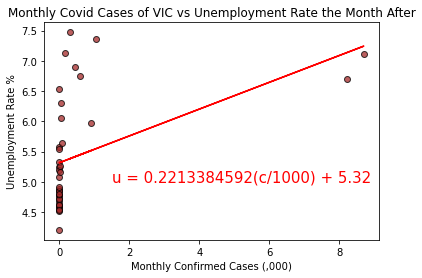

In [31]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_vic, unemployment_vic)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_vic, unemployment_vic)
regress_values = cases_vic * slope + intercept
line_eq = "u = " + str(round(slope,10)) + "(c/1000) + " + str(round(intercept,2))
plt.annotate(line_eq,(1.5,5.0),fontsize=15,color="red")
plt.plot(cases_vic,regress_values,"r-")

print(f"The correlation of monthly covid cases on unemployment rate is {round(correlation[0],2)}")
print(f"The p-value is {round(correlation[1],5)}, with atleast 95% confidence we can reject the null hypothesis.")
print(f"-------------------------------------------------------------------------------------")
print(f"If we can reject the null hypothesis, we can make such statements:")
print(f"-------------------------------------------------------------------------------------")
print(f"Confirmed COVID cases in Australia explains for {round(correlation[0]**2*100,1)}% of the change in unemployment rate in the period after.")
print(f"Every 1000 cases of confirmed COVID cases is expected to cause a {round(slope, 2)}% increase in unemployment rate.")
print(f"The unemployment rate is expected to be {round(intercept,2)}% without the presence of confirmed COVID cases.")

plt.scatter(cases_vic, unemployment_vic, marker="o", facecolors="brown", edgecolors="black", alpha=0.75)
plt.xlabel("Monthly Confirmed Cases (,000)")
plt.ylabel("Unemployment Rate %")
plt.title("Monthly Covid Cases of VIC vs Unemployment Rate the Month After")

#save to output
plt.savefig("../Output/employment_output/confirmed_vs_unemployment_vic_regression.png")

plt.show()

The correlation of monthly covid cases on unemployment rate is 0.24
The p-value is 0.15121, with atleast 95% confidence we cannot reject the null hypothesis.
-------------------------------------------------------------------------------------
If we can reject the null hypothesis, we can make such statements:
-------------------------------------------------------------------------------------
Confirmed COVID cases in Australia explains for 5.6% of the change in unemployment rate in the period after.
Every 1000 cases of confirmed COVID cases is expected to cause a 2.82% increase in unemployment rate.
The unemployment rate is expected to be 6.18% without the presence of confirmed COVID cases.


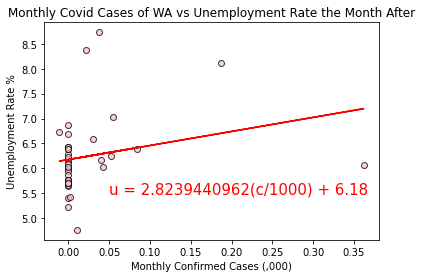

In [30]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_wa, unemployment_wa)

#linear regressions model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_wa, unemployment_wa)
regress_values = cases_wa * slope + intercept
line_eq = "u = " + str(round(slope,10)) + "(c/1000) + " + str(round(intercept,2))
plt.annotate(line_eq,(0.05,5.5),fontsize=15,color="red")
plt.plot(cases_wa,regress_values,"r-")

print(f"The correlation of monthly covid cases on unemployment rate is {round(correlation[0],2)}")
print(f"The p-value is {round(correlation[1],5)}, with atleast 95% confidence we cannot reject the null hypothesis.")
print(f"-------------------------------------------------------------------------------------")
print(f"If we can reject the null hypothesis, we can make such statements:")
print(f"-------------------------------------------------------------------------------------")
print(f"Confirmed COVID cases in Australia explains for {round(correlation[0]**2*100,1)}% of the change in unemployment rate in the period after.")
print(f"Every 1000 cases of confirmed COVID cases is expected to cause a {round(slope, 2)}% increase in unemployment rate.")
print(f"The unemployment rate is expected to be {round(intercept,2)}% without the presence of confirmed COVID cases.")

#plot
plt.scatter(cases_wa, unemployment_wa, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)
plt.xlabel("Monthly Confirmed Cases (,000)")
plt.ylabel("Unemployment Rate %")
plt.title("Monthly Covid Cases of WA vs Unemployment Rate the Month After")

#save to output
plt.savefig("../Output/employment_output/confirmed_vs_unemployment_wa_regression.png")

plt.show()